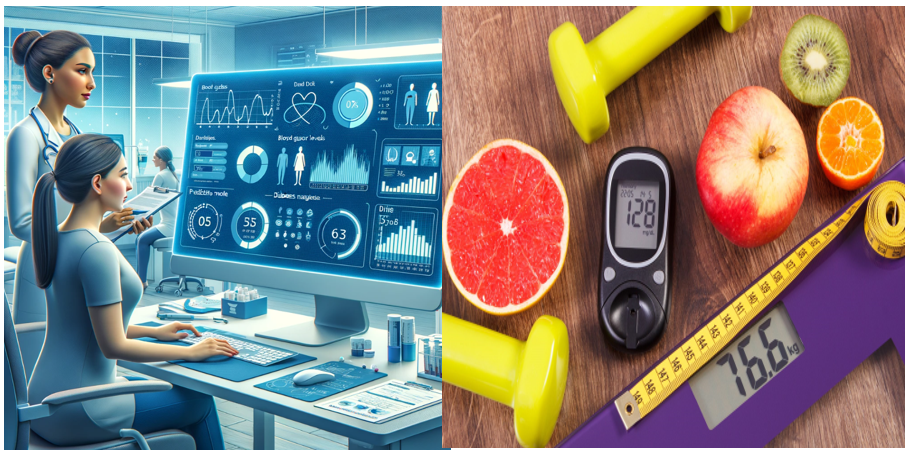

# Predicción de Diabetes

Trabajo con base de datos de diabetes obtenida de kaggle.

Fuente de datos:[https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?resource=download](https://)

Ánalisis Estádistico: [https://github.com/eri2905/Diabetes-Analisis-Estadistico-y-predictivo/blob/main/Proyecto_Estadistica.pdf](https://)

Alumnas:

Hannia Ashley Alvarado Galván

Erika Monserrat Correa Hernández

## Empezamos limpiando nuestro Set de Datos

---



In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Leémos el Set de datos
df = pd.read_csv('diabetes.csv')

In [ ]:
#Checamos las distintas columnas de el data frame
df.columns
#Sustituimos por sus nombres en español
traduccion = {
    'Pregnancies': 'Embarazos',
    'Glucose': 'Glucosa',
    'BloodPressure': 'PresionSanguinea',
    'SkinThickness': 'GrosorPiel',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'FuncionPedigriDiabetes',
    'Age': 'Edad',
    'Outcome': 'Resultado'
}

# Renombramos las columnas en Español
df = df.rename(columns=traduccion)

In [ ]:
df

Embarazos  Glucosa  PresionSanguinea  GrosorPiel  Insulina   IMC  \
0            6      148                72          35         0  33.6   
1            1       85                66          29         0  26.6   
2            8      183                64           0         0  23.3   
3            1       89                66          23        94  28.1   
4            0      137                40          35       168  43.1   
..         ...      ...               ...         ...       ...   ...   
763         10      101                76          48       180  32.9   
764          2      122                70          27         0  36.8   
765          5      121                72          23       112  26.2   
766          1      126                60           0         0  30.1   
767          1       93                70          31         0  30.4   

     FuncionPedigriDiabetes  Edad  Resultado  
0                     0.627    50          1  
1                     0.351    31          0  
2                     0.672    32          1  
3                     0.167    21          0  
4                     2.288    33          1  
..                      ...   ...        ...  
763                   0.171    63          0  
764                   0.340    27          0  
765                   0.245    30          0  
766                   0.349    47          1  
767                   0.315    23          0  

[768 rows x 9 columns]

In [ ]:
#Verificamos la cantidad de renglones y columnas
df.shape

(768, 9)

In [ ]:
#Verificamos la cantidad de ceros que hay en cada columna
ceros_por_columna = (df == 0).sum()
ceros_por_columna

Embarazos                 111
Glucosa                     5
PresionSanguinea           35
GrosorPiel                227
Insulina                  374
IMC                        11
FuncionPedigriDiabetes      0
Edad                        0
Resultado                 500
dtype: int64

En embarazos es normal que no hayan tenido uno, por lo que dejamos los ceros.
Los resultados es normal que haya ceros ya que indica la ausencia de diabetes.
En la Glucosa, Presion Sanguínea y el IMC tienen pocos datos faltantes, por lo que rellenaremos con alguna medida de tendencia central.

El grosor de piel tiene un faltante de el 29.55% de los datos.
La Insulina tiene un faltante del 48.69% de los datos.
Por lo que obtaremos por eliminar estas columnas, ya que al rellenarlas podríamos sesgar el resultado de la predición

In [ ]:
#Eliminamos las columnas del Set de datos
df = df.drop(['GrosorPiel','Insulina'],axis=1)

In [ ]:
#Verificamos que ya se hayan eliminado
df

Embarazos  Glucosa  PresionSanguinea   IMC  FuncionPedigriDiabetes  Edad  \
0            6      148                72  33.6                   0.627    50   
1            1       85                66  26.6                   0.351    31   
2            8      183                64  23.3                   0.672    32   
3            1       89                66  28.1                   0.167    21   
4            0      137                40  43.1                   2.288    33   
..         ...      ...               ...   ...                     ...   ...   
763         10      101                76  32.9                   0.171    63   
764          2      122                70  36.8                   0.340    27   
765          5      121                72  26.2                   0.245    30   
766          1      126                60  30.1                   0.349    47   
767          1       93                70  30.4                   0.315    23   

     Resultado  
0            1  
1            0  
2            1  
3            0  
4            1  
..         ...  
763          0  
764          0  
765          0  
766          1  
767          0  

[768 rows x 7 columns]

In [ ]:
# Volvemos a verificar datos faltantes
ceros_por_columna2 = (df == 0).sum()
ceros_por_columna2

Embarazos                 111
Glucosa                     5
PresionSanguinea           35
IMC                        11
FuncionPedigriDiabetes      0
Edad                        0
Resultado                 500
dtype: int64

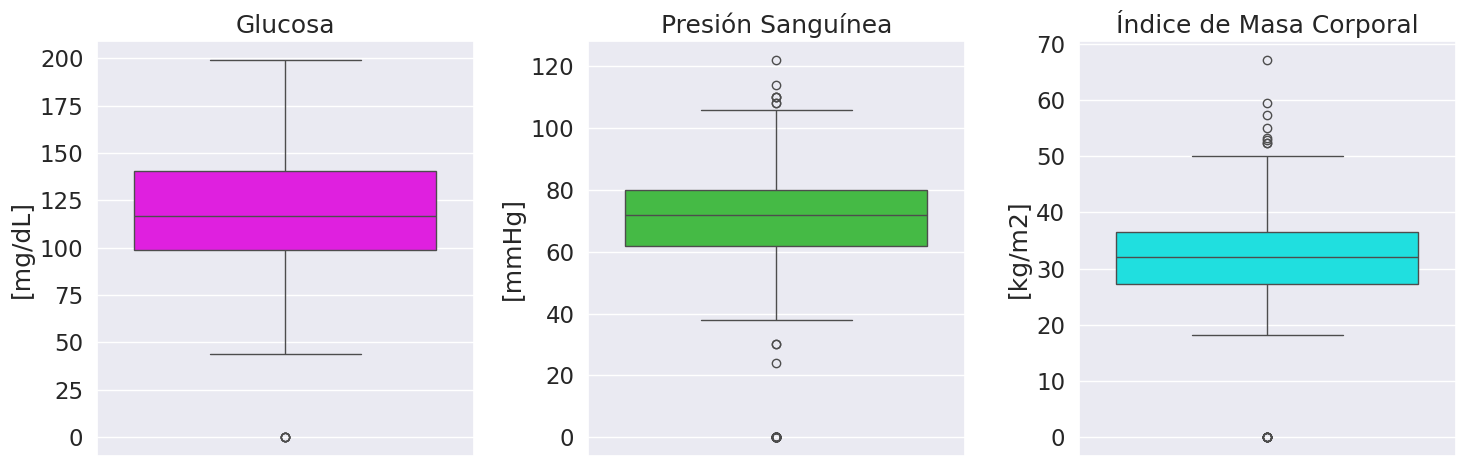

In [ ]:
#Visualización de datos a rellenar
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))

# Gráfica para 'Glucosa'
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
sns.boxplot(data=df, y='Glucosa', color='magenta')
plt.title('Glucosa')  # Título simplificado
plt.ylabel('[mg/dL]')  # Unidad de medida en el eje y

# Gráfica para 'Presión Sanguínea'
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
sns.boxplot(data=df, y='PresionSanguinea', color='limegreen')
plt.title('Presión Sanguínea')  # Título simplificado
plt.ylabel('[mmHg]')  # Unidad de medida en el eje y

# Gráfica para 'IMC'
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
sns.boxplot(data=df, y='IMC', color='cyan')
plt.title('Índice de Masa Corporal')  # Título simplificado
plt.ylabel('[kg/m2]')  # Unidad de medida en el eje y

plt.tight_layout()  # Ajusta automáticamente los subplots para que no se solapen
plt.show()  # Muestra la figura completa


En las columnas de Glucosa, Presion Sanguínea y el IMC  queremos llenar los datos faltantes para hacer un mejores predicciones, queremos elegir entre la media y la mediana.
Para elegir queremos ver si hay valores atípicos o no, por lo que graficaremos una gráfica de caja y bigotes.

Interpretación de los Boxplots:
Glucosa:

La mediana parece estar alrededor de 100.
Los bigotes se extienden desde aproximadamente 60 hasta 160, indicando el rango típico.
Hay algunos valores atípicos por encima de 160.

Se puede observar que los únicos datos atípicos son los de la gráfica de la Glucosa con valor igual a 0.

Presión Sanguínea:

La mediana está cerca de 70.
El rango típico (los bigotes) va desde cerca de 50 hasta 90.

Sepuede observar que hay más datos atípicos que los valores igual a 0 y que  se muestran más en losn  valores de 100 a 120 aprox
Hay varios valores atípicos tanto por debajo de 50 como por encima de 90.
IMC:

La mediana está cerca de 30.
Los bigotes se extienden desde alrededor de 20 hasta 50.
Existen múltiples valores atípicos por encima de 50.

In [ ]:
columnas_a_rellenar = df[['Glucosa','PresionSanguinea','IMC']]
columnas_a_rellenar

Glucosa  PresionSanguinea   IMC
0        148                72  33.6
1         85                66  26.6
2        183                64  23.3
3         89                66  28.1
4        137                40  43.1
..       ...               ...   ...
763      101                76  32.9
764      122                70  36.8
765      121                72  26.2
766      126                60  30.1
767       93                70  30.4

[768 rows x 3 columns]

# Rellenar con la media para cada columna, glucosa, Presión sanguínea e IMC


In [ ]:
tienen_diabetes = df[df['Resultado']==1]
no_tienen =df[df['Resultado']==0]


In [ ]:
def rellenar(df, columna):
  #ESTRATIFICAMOS
  media_ConDiabetes = df[(df['Resultado']==1) & df[columna]!=0][columna].mean()
  media_sinDiabetes = df[(df['Resultado']==0) & df[columna]!=0][columna].mean()
  df.loc[(df['Resultado'] == 1) & (df[columna] == 0), columna] = media_ConDiabetes
  df.loc[(df['Resultado'] == 0) & (df[columna] == 0), columna] = media_sinDiabetes



In [ ]:
rellenar(df, 'Glucosa')
rellenar(df, 'PresionSanguinea')
rellenar(df, 'IMC')

df[df == 0].sum()


Embarazos                 0.0
Glucosa                   0.0
PresionSanguinea          0.0
IMC                       0.0
FuncionPedigriDiabetes    0.0
Edad                      0.0
Resultado                 0.0
dtype: float64

para estandarizar los datos de entrenamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

# Visualización de algunas variables de nuestro dataset

<ipython-input-260-9a4885cb3c7c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resultado', y=columna, data=df, palette=["#3498db", "#e74c3c"])
<ipython-input-260-9a4885cb3c7c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resultado', y=columna, data=df, palette=["#3498db", "#e74c3c"])
<ipython-input-260-9a4885cb3c7c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resultado', y=columna, data=df, palette=["#3498db", "#e74c3c"])
<ipython-input-260-9a4885cb3c7c>:24: FutureWarning: 

Passing `palette` without assigning `hue` i

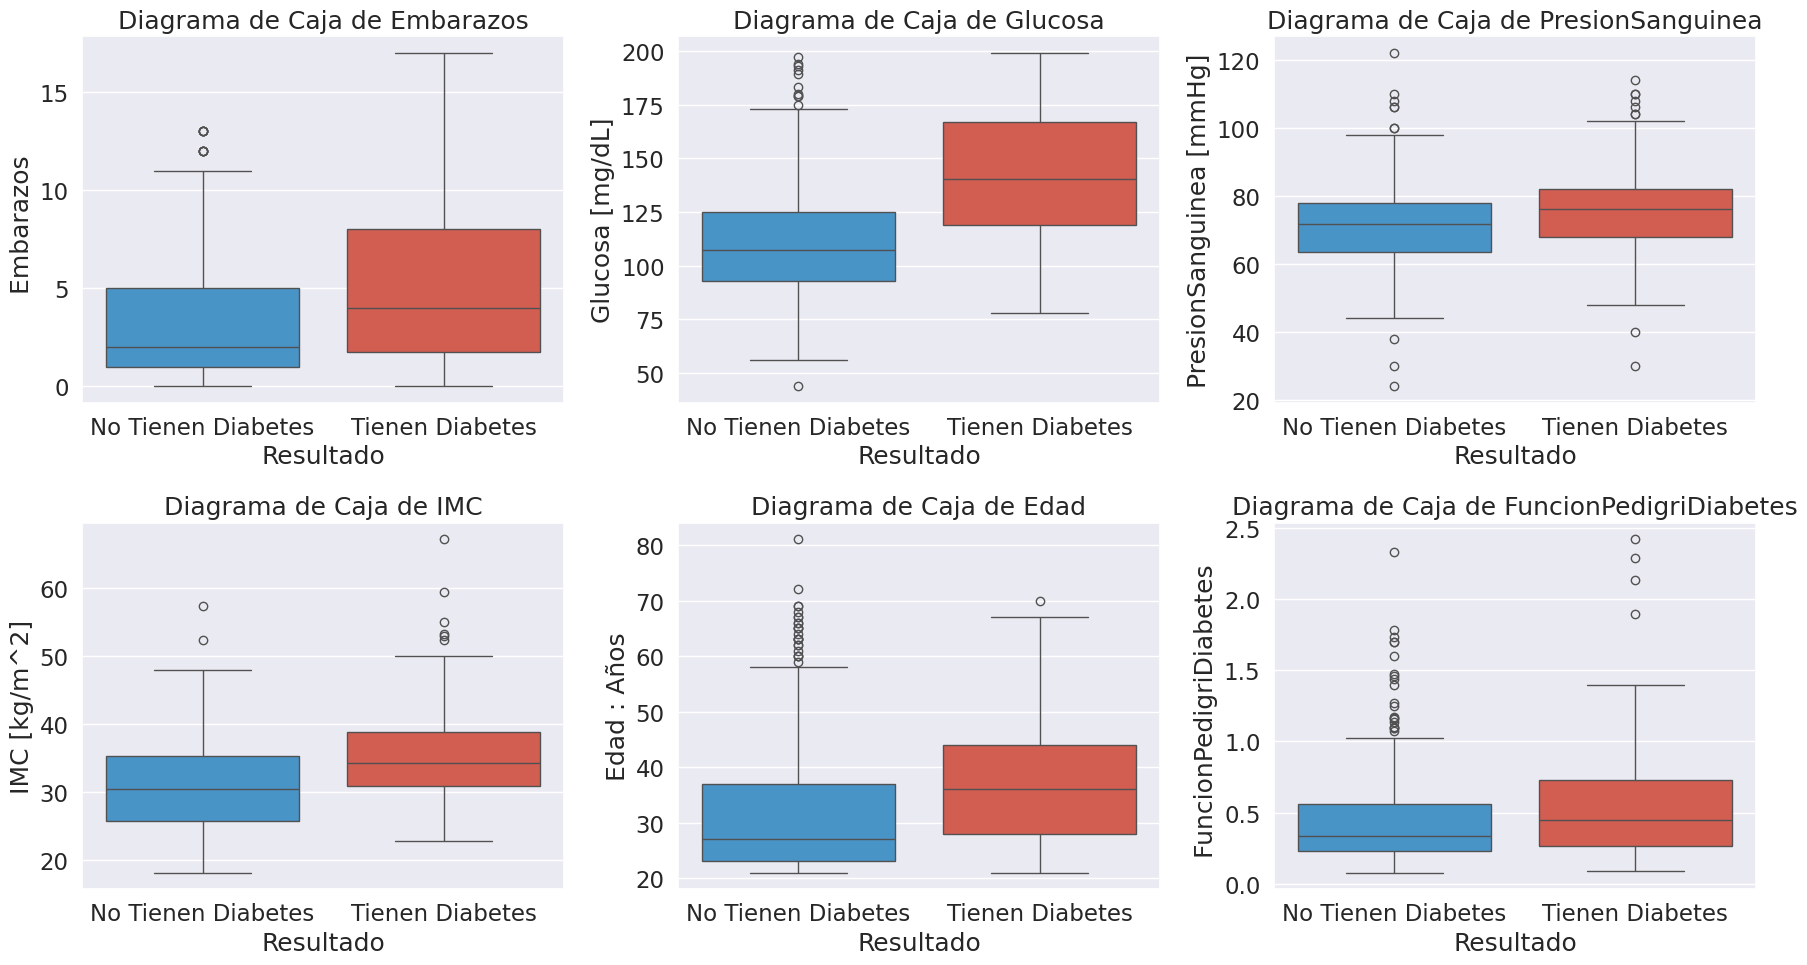

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))


columnas = ['Embarazos', 'Glucosa', 'PresionSanguinea', 'IMC', 'Edad', 'FuncionPedigriDiabetes']

unidades = {
    'Embarazos': '',
    'Glucosa': '[mg/dL]',
    'PresionSanguinea': '[mmHg]',
    'IMC': '[kg/m^2]',
    'Edad': ': Años',
    'FuncionPedigriDiabetes':''
}
n_cols = 3
n_rows = (len(columnas) + n_cols - 1) // n_cols

for i, columna in enumerate(columnas):
    plt.subplot(n_rows, n_cols, i + 1)
    if columna == 'Embarazos':
        df[columna] = df[columna].astype(int)
    sns.boxplot(x='Resultado', y=columna, data=df, palette=["#3498db", "#e74c3c"])
    plt.title(f'Diagrama de Caja de {columna}')
    plt.xlabel('Resultado')
    plt.ylabel(f'{columna} {unidades[columna]}')
    plt.xticks([0, 1], ['No Tienen Diabetes', 'Tienen Diabetes'])

plt.tight_layout()
plt.show()



**Observaciones**
Cada boxplot compara la distribución de los valores para una variable específica entre los dos grupos, ofreciendo una visión clara sobre cómo se diferencian.

**Diagrama de Caja de Embarazos**

Los individuos que tienen diabetes tienden a tener un mayor número de embarazos en comparación con aquellos que no tienen diabetes. Este resultado puede ser indicativo de un vínculo entre la frecuencia de embarazos y el riesgo de desarrollar diabetes, probablemente debido a la relación entre diabetes gestacional y diabetes tipo 2.
**Diagrama de Caja de Glucosa**

 Los niveles de glucosa son notablemente más altos en personas con diabetes. Esta es una distinción clara que refleja cómo la hiperglucemia es un marcador central de la diabetes.

**Diagrama de Caja de Presión Sanguínea**

Hay una diferencia leve en la presión sanguínea entre los dos grupos, con los individuos diabéticos mostrando niveles ligeramente más altos. Esto sugiere una posible correlación entre la hipertensión y la diabetes, lo cual es conocido en la literatura médica como parte del síndrome metabólico.

**Diagrama de Caja de IMC**
 Los individuos con diabetes tienen un IMC más alto en promedio, indicando una relación entre la obesidad o sobrepeso y la diabetes. Esto está en línea con la comprensión de que un IMC elevado es un factor de riesgo para el desarrollo de diabetes tipo 2.

**Diagrama de Caja de Función Pedigrí de Diabetes**

La función de pedigrí de diabetes es ligeramente mayor en promedio en aquellos con diabetes. Este es un indicador genético que refleja la predisposición hereditaria a desarrollar la enfermedad.
**Diagrama de Caja de Edad**

La distribución de la edad muestra que los individuos con diabetes son generalmente mayores. Esto refleja el aumento del riesgo de diabetes con la edad y está en línea con la epidemiología de la diabetes tipo 2, que frecuentemente se desarrolla más tarde en la vida.



# Correlaciones

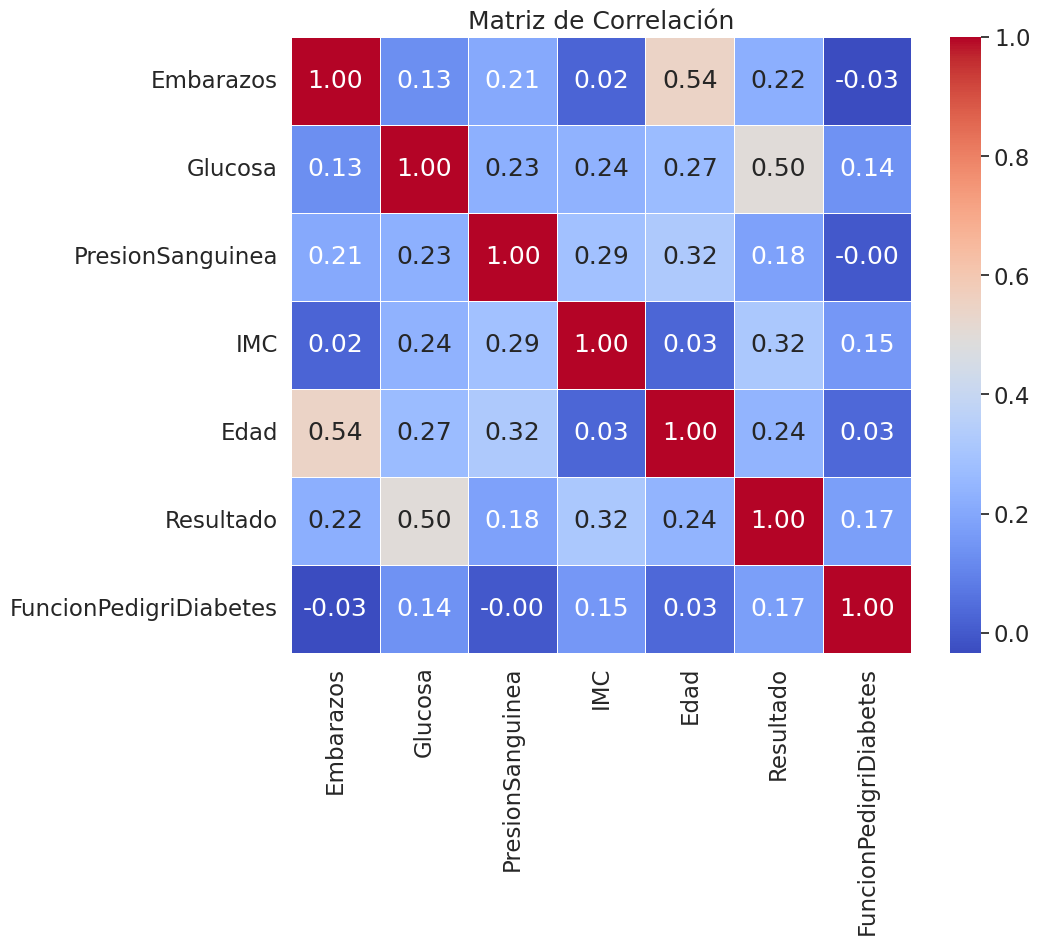

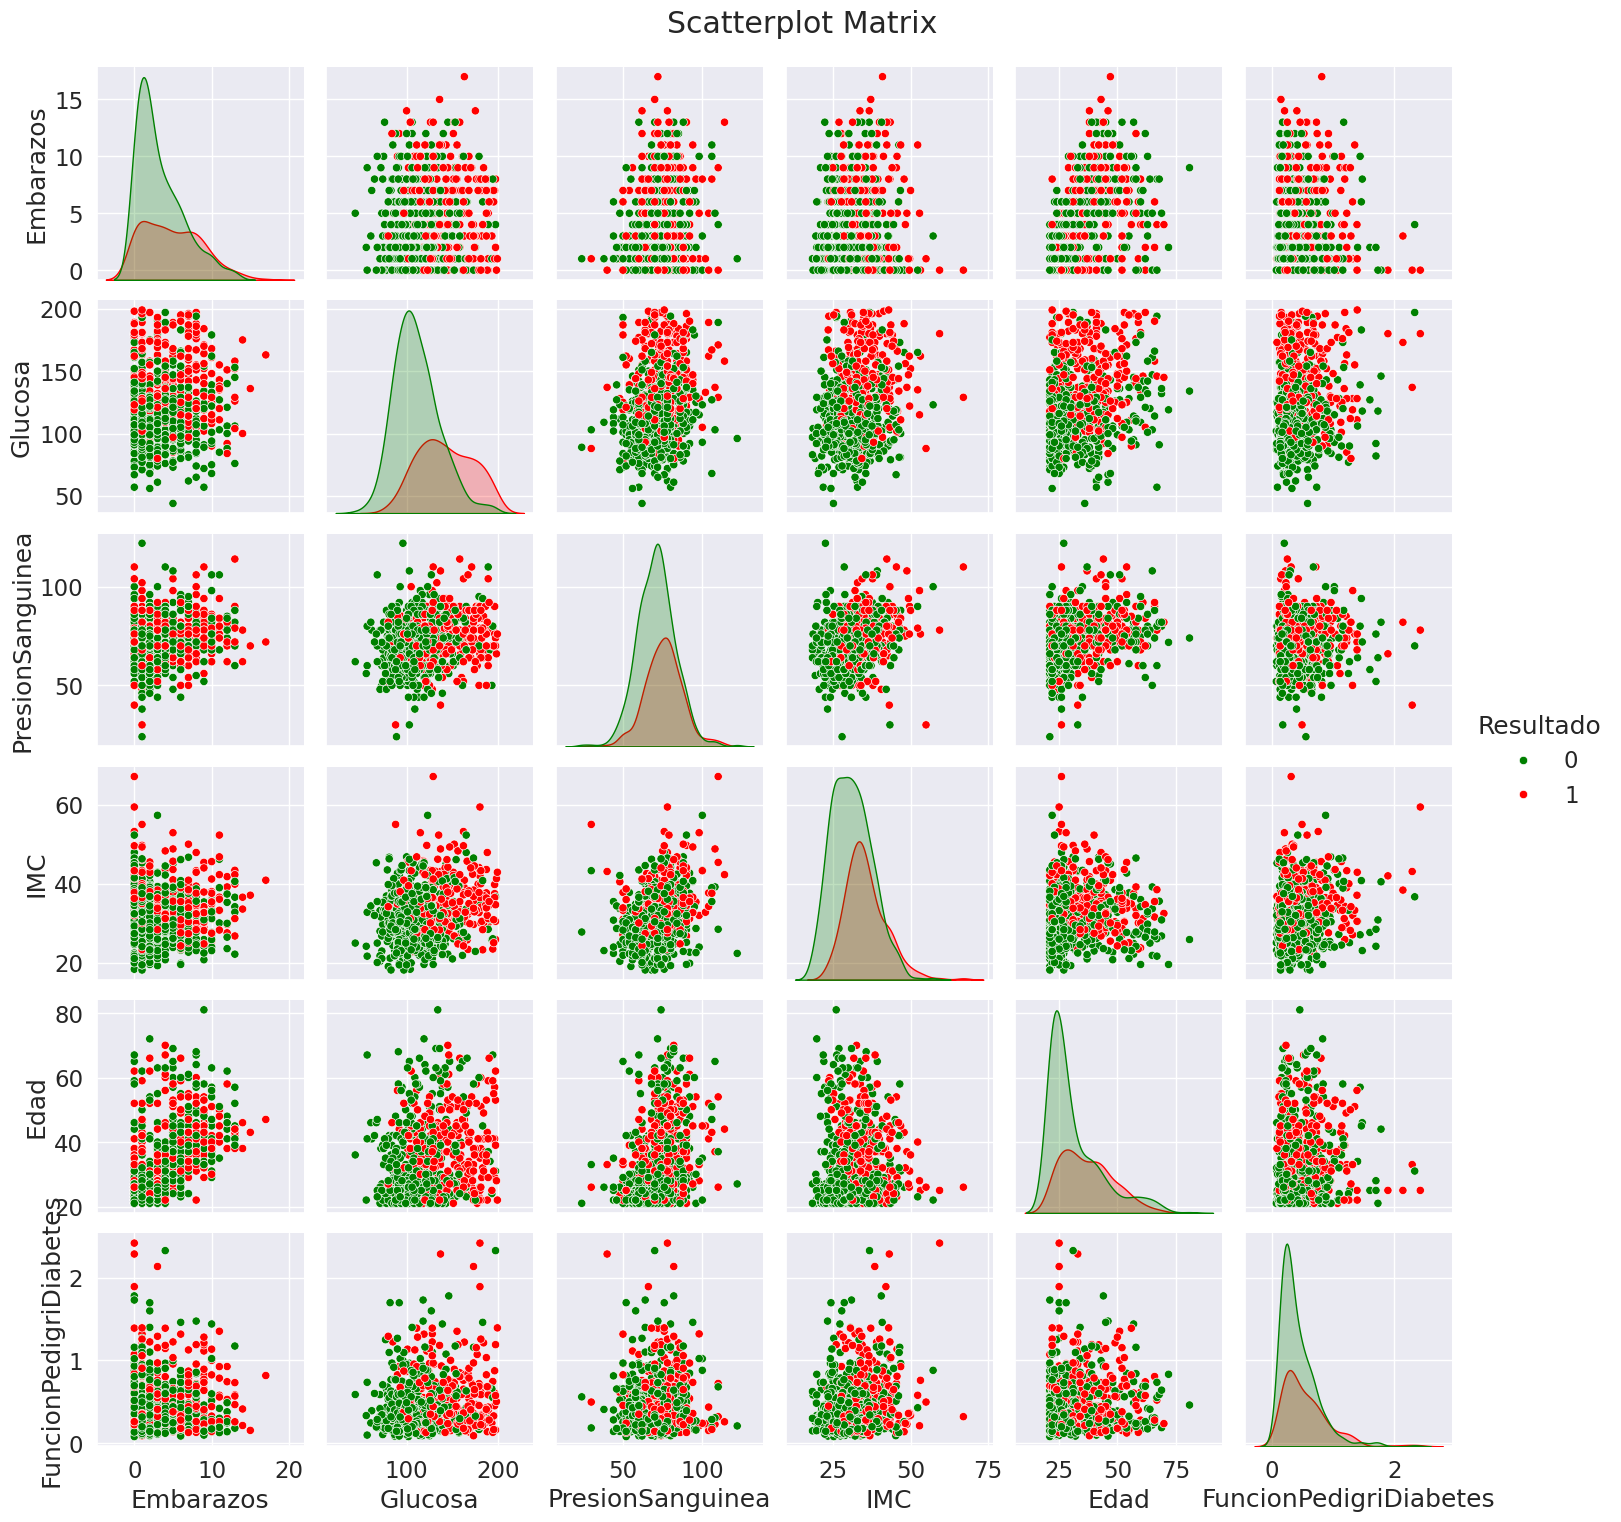

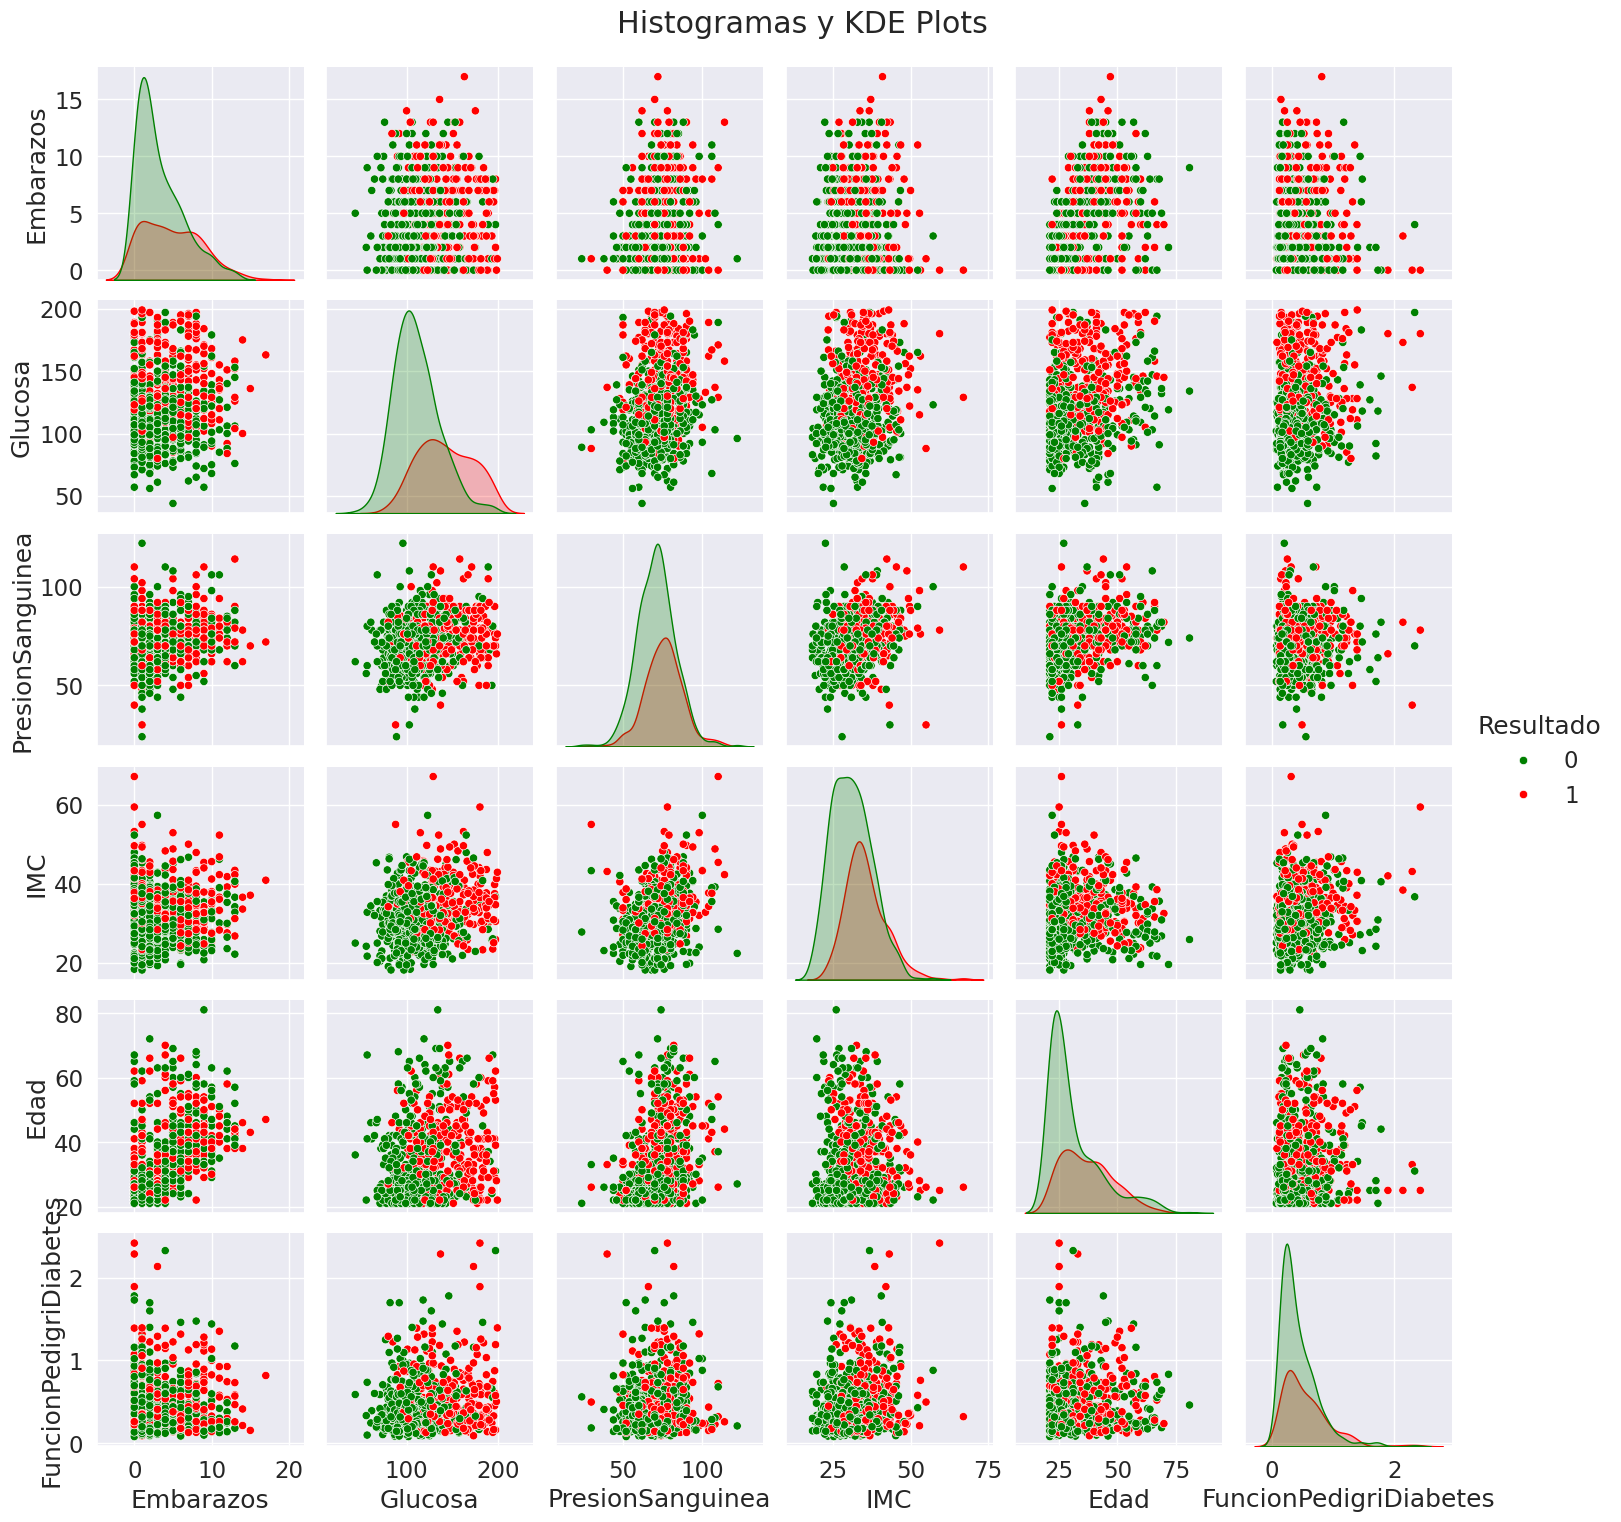

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


data = df[['Embarazos', 'Glucosa', 'PresionSanguinea', 'IMC', 'Edad', 'Resultado', 'FuncionPedigriDiabetes']]

# Calculamos la matriz de correlación
corr = data.corr()

#  Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#  Scatterplot matrix
sns.pairplot(data, hue='Resultado', palette={1: "red", 0: "green"})
plt.suptitle('Scatterplot Matrix', y=1.02)  # Ajuste para evitar solapamiento con la leyenda
plt.show()

# Histogramas y KDE plots
sns.pairplot(data, diag_kind='kde', hue='Resultado', palette={1: "red", 0: "green"})
plt.suptitle('Histogramas y KDE Plots', y=1.02)  # Ajuste para evitar solapamiento con la leyenda
plt.show()


# Aplicamos los modelos



#Aplicamos el modelo de Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Separamos en entrenamiento y prueba

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.iloc[:,:-1], #matriz
                                                df.iloc[:,-1], #etiquetas
                                                test_size=.2, #porcenraje del test
                                                shuffle=True,#para que no tome en cuenta los indices
                                                random_state = 42


                                                )

In [ ]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador solo en los datos de entrenamiento
scaler.fit(Xtrain)
Xtrain= scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
#usamos gaussian porque son datos numericos
clasificador = GaussianNB()
clasificador.fit(Xtrain, Ytrain)

GaussianNB()

In [ ]:
#dimensiones de nuestros datos
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)


(614, 6)
(614,)
(154, 6)
(154,)


In [ ]:
ypred_NV = clasificador.predict(Xtest)


In [ ]:
as_NV = accuracy_score(Ytest, ypred_NV)
p_NV = precision_score(Ytest, ypred_NV)
r_NV = recall_score(Ytest, ypred_NV)
f1_NV = f1_score(Ytest, ypred_NV)

print('accuracy', as_NV)
print('precision',p_NV)
print('recall',r_NV)
print('f1',f1_NV)

accuracy 0.7532467532467533
precision 0.6491228070175439
recall 0.6727272727272727
f1 0.6607142857142858


#Aplicamos k-Vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [ ]:
ypred_knn= knn.predict(Xtest)
as_knn = accuracy_score(Ytest, ypred_knn)
p_knn = precision_score(Ytest, ypred_knn,average='weighted')
r_knn = recall_score(Ytest, ypred_knn, average='weighted')
f1_knn = f1_score(Ytest, ypred_knn,average='weighted')


#Aplicamos Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:

decision_tree.fit(Xtrain,Ytrain)
ypred_dt= decision_tree.predict(Xtest)


In [ ]:
as_dt = accuracy_score(Ytest, ypred_dt)
p_dt = precision_score(Ytest, ypred_dt)
r_dt = recall_score(Ytest, ypred_dt)
f1_dt = f1_score(Ytest, ypred_dt)

print('accuracy', as_dt)
print('precision',p_dt)
print('recall',r_dt)
print('f1',f1_dt)

accuracy 0.7662337662337663
precision 0.6666666666666666
recall 0.6909090909090909
f1 0.6785714285714286


# Aplicamos Regresión logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(Xtrain,Ytrain)

LogisticRegression()

In [ ]:
ypred_lr= logistic_model.predict(Xtest)

In [ ]:
as_lr = accuracy_score(Ytest, ypred_lr)
p_lr = precision_score(Ytest, ypred_lr)
r_lr = recall_score(Ytest, ypred_lr)
f1_lr = f1_score(Ytest, ypred_lr)

print('accuracy', as_lr)
print('precision',p_lr)
print('recall',r_lr)
print('f1',f1_lr)

accuracy 0.7532467532467533
precision 0.6666666666666666
recall 0.6181818181818182
f1 0.6415094339622642


# Aplicamos Máquinas de Soporte Vectorial

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import balanced_accuracy_score

Usando C = 1 y kernel = rbF

In [ ]:
model1 = SVC(C=1,kernel = 'rbf', decision_function_shape='ovr')
model1.fit(Xtrain, Ytrain)
pred1= model1.predict(Xtest)

as_mv1 = accuracy_score(Ytest,pred1)
p_mv1 = precision_score(Ytest, pred1)
r_mv1 = recall_score(Ytest, pred1)
f1_mv1 = f1_score(Ytest, pred1,average='weighted')

print('accuracy', as_mv1)
print('precision',p_mv1)
print('recall',r_mv1)
print('f1',f1_mv1)

accuracy 0.7727272727272727
precision 0.7
recall 0.6363636363636364
f1 0.7701149425287357


Usando C = 0.1 y kernel = rbF

In [ ]:
model2 = SVC(C=0.1,kernel = 'rbf', decision_function_shape='ovr')
model2.fit(Xtrain, Ytrain)
pred2= model2.predict(Xtest)

as_mv2 = accuracy_score(Ytest,pred2)
p_mv2 = precision_score(Ytest,pred2)
r_mv2 = recall_score(Ytest, pred2)
f1_mv2 = f1_score(Ytest, pred2,average='weighted')

print('accuracy', as_mv2)
print('precision',p_mv2)
print('recall',r_mv2)
print('f1',f1_mv2)

accuracy 0.7662337662337663
precision 0.7209302325581395
recall 0.5636363636363636
f1 0.758600583090379


Cambiando el kernel a lineal

In [ ]:
model3 = SVC(C=1,kernel = 'linear', decision_function_shape='ovr')
model3.fit(Xtrain, Ytrain)
pred3= model3.predict(Xtest)

as_mv3 = accuracy_score(Ytest,pred3)
p_mv3 = precision_score(Ytest, pred3)
r_mv3 = recall_score(Ytest, pred3)
f1_mv3 = f1_score(Ytest, pred3,average='weighted')

print("c =1")
print('accuracy', as_mv3)
print('precision ',p_mv3)
print('recall ',r_mv3)
print('f1 ',f1_mv3)





c =1
accuracy 0.7597402597402597
precision  0.68
recall  0.6181818181818182
f1  0.7569786535303777


In [ ]:
model4 = SVC(C=0.1,kernel = 'linear', decision_function_shape='ovr')
model4.fit(Xtrain, Ytrain)
pred4= model4.predict(Xtest)

as_mv4 = accuracy_score(Ytest,pred4)
p_mv4 = precision_score(Ytest, pred4)
r_mv4 = recall_score(Ytest, pred4)
f1_mv4 = f1_score(Ytest, pred4,average='weighted')

print("c =0.1")
print('accuracy', as_mv4)
print('precision ',p_mv4)
print('recall ',r_mv4)
print('f1 ',f1_mv4)

c =0.1
accuracy 0.7532467532467533
precision  0.6666666666666666
recall  0.6181818181818182
f1  0.751034133062902


#Comparación de los modelos de Máquinas de Soporte Vectorial

In [ ]:
svc_data = [
    {'Kernel': 'rbf','Accuracy': as_mv1 , 'Precision': p_mv1, 'Recall': r_mv1, 'f1': f1_mv1, 'c': 1},
    {'Kernel': 'rbf','Accuracy': as_mv2 , 'Precision': p_mv2, 'Recall': r_mv2, 'f1': f1_mv2,'c': 0.1},
    {'Kernel': 'linear','Accuracy': as_mv3 , 'Precision': p_mv3, 'Recall': r_mv3, 'f1': f1_mv3,'c': 1},
    {'Kernel': 'linear','Accuracy': as_mv4 , 'Precision': p_mv4, 'Recall': r_mv4, 'f1': f1_mv4,'c': 0.1},

]

svc_modelos = pd.DataFrame(svc_data)
svc_modelos

Kernel  Accuracy  Precision    Recall        f1    c
0     rbf  0.772727   0.700000  0.636364  0.770115  1.0
1     rbf  0.766234   0.720930  0.563636  0.758601  0.1
2  linear  0.759740   0.680000  0.618182  0.756979  1.0
3  linear  0.753247   0.666667  0.618182  0.751034  0.1

# Comparando los modelos el mejor fue el que tiene el kernel rbf con C = 1, ya que tiene un mejor accuracy y la métrica que más nos interesa para el caso de datos médicos es la sensibilidad

# Tabla de comparación entre los modelos

In [ ]:
datos = [
    {'Modelo': 'Naive Bayes(Gaussian)', 'Accuracy': as_NV , 'Precision': p_NV, 'Recall': r_NV, 'f1': f1_NV},
    {'Modelo': 'KNN', 'Accuracy': as_knn , 'Precision': p_knn, 'Recall': r_knn, 'f1': f1_knn},
    {'Modelo': 'Decision Tree', 'Accuracy': as_dt , 'Precision': p_dt, 'Recall': r_dt, 'f1': f1_dt},
    {'Modelo': 'Logistic Regression', 'Accuracy': as_lr , 'Precision': p_lr, 'Recall': r_lr, 'f1': f1_lr},
    {'Modelo': 'SVM', 'Accuracy': as_mv1 , 'Precision': p_mv1, 'Recall': r_mv1, 'f1': f1_mv1},

]

In [ ]:
modelos = pd.DataFrame(datos)
modelos

Modelo  Accuracy  Precision    Recall        f1
0  Naive Bayes(Gaussian)  0.753247   0.649123  0.672727  0.660714
1                    KNN  0.740260   0.747828  0.740260  0.742919
2          Decision Tree  0.766234   0.666667  0.690909  0.678571
3    Logistic Regression  0.753247   0.666667  0.618182  0.641509
4                    SVM  0.772727   0.700000  0.636364  0.770115

# Vamos a probar los modelos cambiando las variables a categorias

In [ ]:
#glucosa

bins= [0, 70, 140, float('inf')]
labels= ['Baja', 'Media', 'Alta']
#Categorizar los niveles de glucosa
df['Glucosa'] = pd.cut(df['Glucosa'], bins=bins, labels=labels, right=False)



In [ ]:
# edad

def categorizar_edad(edad):
     if 21 <= edad <= 35:
         return 'Jóvenes adultos'
     elif 36 <= edad <= 50:
         return 'Adultos de mediana edad'
     elif 51 <= edad <= 65:
         return 'Adultos mayores'
     elif edad >= 66:
         return 'Ancianos'

df['Edad'] = df['Edad'].apply(categorizar_edad)


In [ ]:
# presion
def categorizar_presion(presion):
    if presion < 90:
         return 'Baja'
    elif 90 <= presion <= 120:
         return 'Normal'
    elif 121 <= presion <= 140:
         return 'Elevada'
    elif presion > 140:
         return 'Alta'

df['PresionSanguinea'] = df['PresionSanguinea'].apply(categorizar_edad)

In [ ]:
#imc

def categorizar_imc(imc):
     if imc < 18.5:
         return 'Bajo peso'
     elif 18.5 <= imc <= 24.9:
         return 'Normal'
     elif 25 <= imc <= 29.9:
         return 'Sobrepeso'
     else:
         return 'Obesidad'


df['IMC'] = df['IMC'].apply(categorizar_imc)

In [ ]:
#pedigri

def categorizar_pedigri(dpf):
     if dpf < 0.5:
         return 'Bajo'
     elif 0.5 <= dpf < 1.0:
         return 'Moderado'
     else:
         return 'Alto'

df['FuncionPedigriDiabetes'] = df['FuncionPedigriDiabetes'].apply(categorizar_pedigri)

In [ ]:
df

Embarazos Glucosa         PresionSanguinea        IMC  \
0            6    Alta                 Ancianos   Obesidad   
1            1   Media                 Ancianos  Sobrepeso   
2            8    Alta          Adultos mayores     Normal   
3            1   Media                 Ancianos  Sobrepeso   
4            0   Media  Adultos de mediana edad   Obesidad   
..         ...     ...                      ...        ...   
763         10   Media                 Ancianos   Obesidad   
764          2   Media                 Ancianos   Obesidad   
765          5   Media                 Ancianos  Sobrepeso   
766          1   Media          Adultos mayores   Obesidad   
767          1   Media                 Ancianos   Obesidad   

    FuncionPedigriDiabetes                     Edad  Resultado  
0                 Moderado  Adultos de mediana edad          1  
1                     Bajo          Jóvenes adultos          0  
2                 Moderado          Jóvenes adultos          1  
3                     Bajo          Jóvenes adultos          0  
4                     Alto          Jóvenes adultos          1  
..                     ...                      ...        ...  
763                   Bajo          Adultos mayores          0  
764                   Bajo          Jóvenes adultos          0  
765                   Bajo          Jóvenes adultos          0  
766                   Bajo  Adultos de mediana edad          1  
767                   Bajo          Jóvenes adultos          0  

[768 rows x 7 columns]

In [ ]:
df_new = df.apply(LabelEncoder().fit_transform)


#Dividimos en entrenamiento y test

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df_new.iloc[:,:-1],
                                                df_new.iloc[:,-1],
                                                test_size=.2,
                                                random_state = 42,
                                                shuffle=True

)

In [ ]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador solo en los datos de entrenamiento
scaler.fit(xtrain)
xtrain= scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
from sklearn.naive_bayes import CategoricalNB

#Naive Bayes

No se pudo usar naive bayes porque la estandarizacion produjo valores negativos y esos no se aceptan

In [ ]:
'''clasificadorCategorico = CategoricalNB()
clasificadorCategorico.fit(xtrain,ytrain)
ypred= clasificadorCategorico.predict(xtest)


as_NV = accuracy_score(ytest, ypred)
p_NV = precision_score(ytest, ypred, average='weighted')
r_NV = recall_score(ytest, ypred, average='weighted')
f1_NV = f1_score(ytest, ypred, average='weighted')'''

"clasificadorCategorico = CategoricalNB()\nclasificadorCategorico.fit(xtrain,ytrain)\nypred= clasificadorCategorico.predict(xtest)\n\n\nas_NV = accuracy_score(ytest, ypred)\np_NV = precision_score(ytest, ypred, average='weighted')\nr_NV = recall_score(ytest, ypred, average='weighted')\nf1_NV = f1_score(ytest, ypred, average='weighted')"

#K-N Vecinos más cercanos

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred_knn= knn.predict(xtest)

as_knn = accuracy_score(ytest, ypred_knn)
p_knn = precision_score(ytest, ypred_knn,average='weighted')
r_knn = recall_score(ytest, ypred_knn, average='weighted')
f1_knn = f1_score(ytest, ypred_knn,average='weighted')


#Árbol de decisión

In [ ]:

decision_tree = DecisionTreeClassifier(max_depth=1)
decision_tree.fit(xtrain,ytrain)
ypred_dt= decision_tree.predict(xtest)

as_dt = accuracy_score(ytest, ypred_dt)
p_dt = precision_score(ytest, ypred_dt,average='weighted')
r_dt = recall_score(ytest, ypred_dt,average='weighted')
f1_dt = f1_score(ytest, ypred_dt,average='weighted')

# Regresión Logística

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain,ytrain)
ypred_lr= logistic_model.predict(xtest)


as_lr = accuracy_score(ytest, ypred_lr)
p_lr = precision_score(ytest, ypred_lr,average='weighted')
r_lr = recall_score(ytest, ypred_lr,average='weighted')
f1_lr = f1_score(ytest, ypred_lr,average='weighted')

# Máquinas de Soporte Vectorial

In [ ]:
model1 = SVC(C=1, kernel = 'rbf', decision_function_shape='ovr')
model1.fit(xtrain, ytrain)
pred1= model1.predict(xtest)

as_mv = accuracy_score(ytest,pred1)
p_mv = precision_score(ytest, ypred_lr,average='weighted')
r_mv = recall_score(ytest, ypred_lr,average='weighted')
f1_mv = f1_score(ytest, pred1,average='weighted')

In [ ]:
datos2 = [

    {'Modelo': 'KNN', 'Accuracy': as_knn , 'Precision': p_knn, 'Recall': r_knn, 'f1': f1_knn},
    {'Modelo': 'Decision Tree', 'Accuracy': as_dt , 'Precision': p_dt, 'Recall': r_dt, 'f1': f1_dt},
    {'Modelo': 'Logistic Regression', 'Accuracy': as_lr , 'Precision': p_lr, 'Recall': r_lr, 'f1': f1_lr},
    {'Modelo': 'SVM', 'Accuracy': as_mv , 'Precision': p_mv, 'Recall': r_mv, 'f1': f1_mv},

]

In [ ]:
modelo2 = pd.DataFrame(datos2)
modelo2

Modelo  Accuracy  Precision    Recall        f1
0                  KNN  0.746753   0.747813  0.746753  0.747251
1        Decision Tree  0.759740   0.754400  0.759740  0.754259
2  Logistic Regression  0.740260   0.733508  0.740260  0.733516
3                  SVM  0.772727   0.733508  0.740260  0.766082

In [ ]:
modelos

Modelo  Accuracy  Precision    Recall        f1
0  Naive Bayes(Gaussian)  0.753247   0.649123  0.672727  0.660714
1                    KNN  0.740260   0.747828  0.740260  0.742919
2          Decision Tree  0.766234   0.666667  0.690909  0.678571
3    Logistic Regression  0.753247   0.666667  0.618182  0.641509
4                    SVM  0.772727   0.700000  0.636364  0.770115

# Promedio de las metricas del primero modelo

In [ ]:
modelos['Promedio'] = modelos[['Accuracy', 'Precision', 'Recall', 'f1']].mean(axis=1)
modelos

Modelo  Accuracy  Precision    Recall        f1  Promedio
0  Naive Bayes(Gaussian)  0.753247   0.649123  0.672727  0.660714  0.683953
1                    KNN  0.740260   0.747828  0.740260  0.742919  0.742817
2          Decision Tree  0.766234   0.666667  0.690909  0.678571  0.700595
3    Logistic Regression  0.753247   0.666667  0.618182  0.641509  0.669901
4                    SVM  0.772727   0.700000  0.636364  0.770115  0.719801

#Promedio de las métricas del segundo modelo

In [ ]:
modelo2['Promedio'] = modelo2[['Accuracy', 'Precision', 'Recall', 'f1']].mean(axis=1)
modelo2

Modelo  Accuracy  Precision    Recall        f1  Promedio
0                  KNN  0.746753   0.747813  0.746753  0.747251  0.747143
1        Decision Tree  0.759740   0.754400  0.759740  0.754259  0.757035
2  Logistic Regression  0.740260   0.733508  0.740260  0.733516  0.736886
3                  SVM  0.772727   0.733508  0.740260  0.766082  0.753144

No hay una gran diferencia en el accuracy pero decidimos optar por el modelo 2 de categorizarlo, ya que en el modelo de SVM tenemos un valor mayor en Recall, que es la métrica que más nos interesa

La F_beta que se decidió utilizar para determinar el mejor modelo fue la sensibilidad, ya que los datos que se tratan son de salud, y es preferible dar un falso positivo, por lo tanto, el modelo ganador es : Decision Tree


Para el ensamble se usaran los modelos de regresión logística, SVM y decision tree

In [ ]:
lr = LogisticRegression(random_state=1)
svc = SVC(C=0.1,decision_function_shape='ovr', random_state=1)
dt = DecisionTreeClassifier(random_state=1)

clasificadores = [('Regresion Logistica', lr),
                  ('SVC', svc),
                  ('Arbol de decision', dt)]

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=clasificadores)
vc.fit(Xtrain,Ytrain)
yPred = vc.predict(Xtest)
accuracy = accuracy_score(ytest,yPred)
precision = precision_score(ytest, yPred,average='weighted')
recall= recall_score(ytest,yPred,average='weighted')
f1 = f1_score(ytest, yPred,average='weighted')

print('accuracy', accuracy)
print('precision ',precision)
print('recall ',recall)
print('f1 ',f1)

accuracy 0.7662337662337663
precision  0.7614407862966225
recall  0.7662337662337663
f1  0.7616056131190341


#Evaluación en entrenamiento y prueba

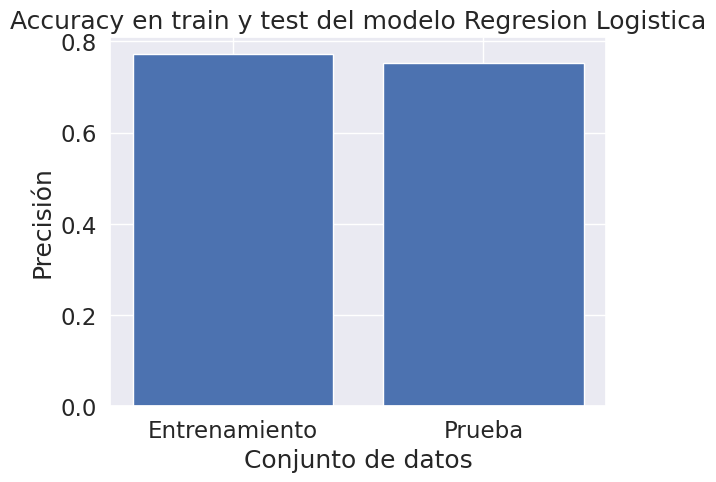

Regresion Logistica en test: 0.7532467532467533
Regresion Logistica en train: 0.7719869706840391


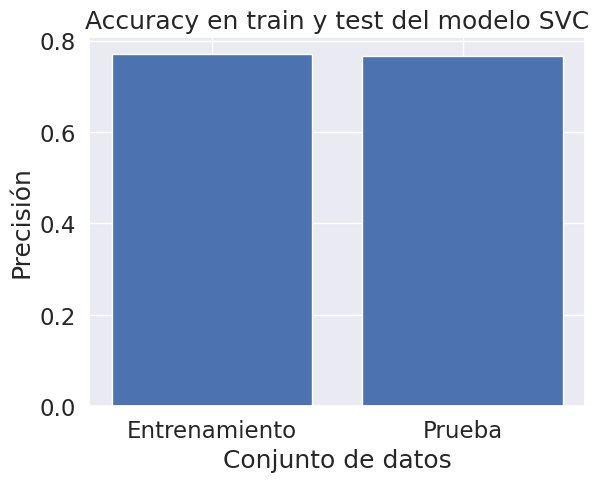

SVC en test: 0.7662337662337663
SVC en train: 0.7703583061889251


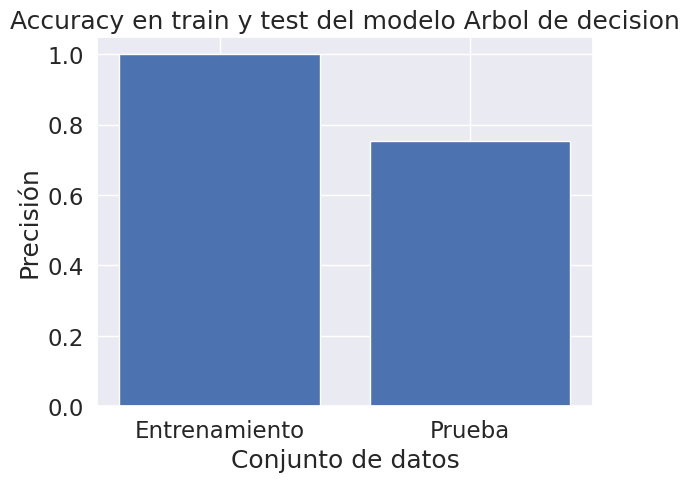

Arbol de decision en test: 0.7532467532467533
Arbol de decision en train: 1.0


In [ ]:
resultados_train = []
resultados_test = []

for clasificador,modelo in clasificadores:
  modelo.fit(Xtrain, Ytrain)
  yPred= modelo.predict(Xtest)
  ytrainB = modelo.predict(Xtrain)
  accuracy = accuracy_score(Ytest,yPred)
  accuracy2 = accuracy_score(Ytrain,ytrainB)

  y = [accuracy2, accuracy]
  x = ['Entrenamiento', 'Prueba']

  resultados_test.append(accuracy)
  resultados_train.append(accuracy2)
  plt.bar(x, y)

  # Añadir título y etiquetas de los ejes
  plt.title(f'Accuracy en train y test del modelo {clasificador}')
  plt.xlabel('Conjunto de datos')
  plt.ylabel('Precisión')

  # Mostrar el gráfico
  plt.show()
  print(clasificador+' en test: '+str(accuracy))
  print(clasificador+' en train: '+str(accuracy2))

In [ ]:
data_modelos = [{'modelo': 'Regresión logística',
  'Accuracy train': resultados_train[0],
  'Accuracy test': resultados_test[0]},
 {'modelo': 'SVM',
  'Accuracy train': resultados_train[1],
  'Accuracy test': resultados_test[1]},
 {'modelo': 'Árboles de decisión',
  'Accuracy train': resultados_train[2],
  'Accuracy test': resultados_test[2]}]


train_test = pd.DataFrame(data_modelos)

In [ ]:
train_test

modelo  Accuracy train  Accuracy test
0  Regresión logística        0.771987       0.753247
1                  SVM        0.770358       0.766234
2  Árboles de decisión        1.000000       0.753247

#Matrices de Confusión

K-N Vecinos más cercanos

In [ ]:
from sklearn.metrics import confusion_matrix

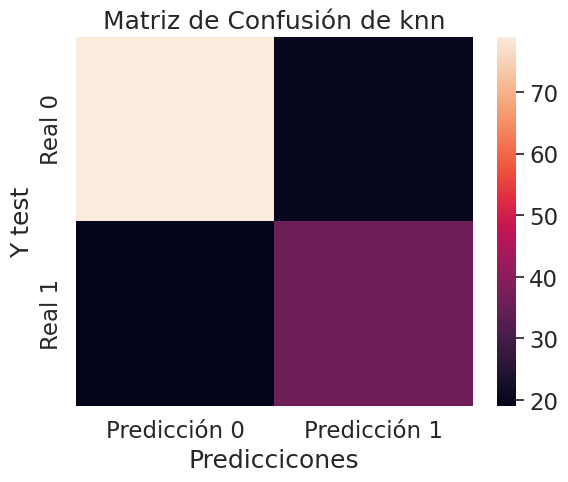

In [ ]:
  m = confusion_matrix(ytest, ypred_knn)

  # Crear un mapa de calor con seaborn
  # Ajusta el tamaño de la fuente
  sns.heatmap(m,
              xticklabels=['Predicción 0', 'Predicción 1'],
              yticklabels=['Real 0', 'Real 1'])

  # Añadir etiquetas
  plt.xlabel('Prediccicones')
  plt.ylabel('Y test')
  plt.title('Matriz de Confusión de knn')

  plt.show()

In [ ]:
!pip install scikit-plot


In [ ]:
import scikitplot as skplt  # Asegúrate de tener scikitplot instalado
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Asumiendo que 'ytest' y 'ypred_knn' están definidos correctamente en tu código
# No necesitas generar la matriz de confusión manualmente como con Seaborn

# Usar scikitplot para visualizar la matriz de confusión
skplt.metrics.plot_confusion_matrix(ytest, ypred_knn,
                                    figsize=(8, 6),  # Ajusta el tamaño de la figura
                                    title='Matriz de Confusión de KNN',  # Título del gráfico
                                    normalize=False,  # Muestra números absolutos, cambia a True para frecuencias relativas
                                    cmap='Blues')  # Color del mapa de calor
plt.show()


# Árboles de decisión

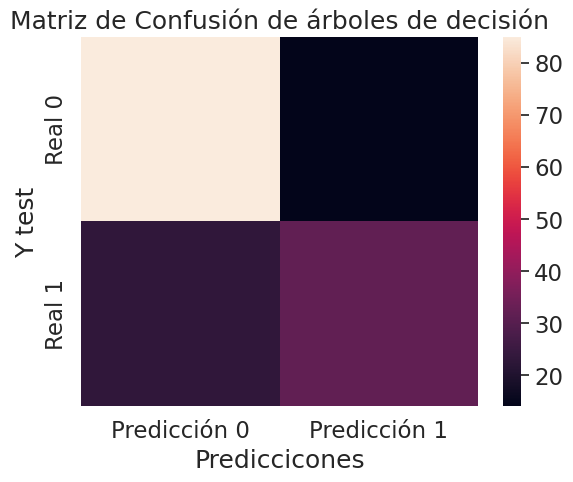

In [ ]:
m = confusion_matrix(ytest, ypred_dt)

# Crear un mapa de calor con seaborn
 # Ajusta el tamaño de la fuente
sns.heatmap(m,
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas
plt.xlabel('Prediccicones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión de árboles de decisión')

plt.show()

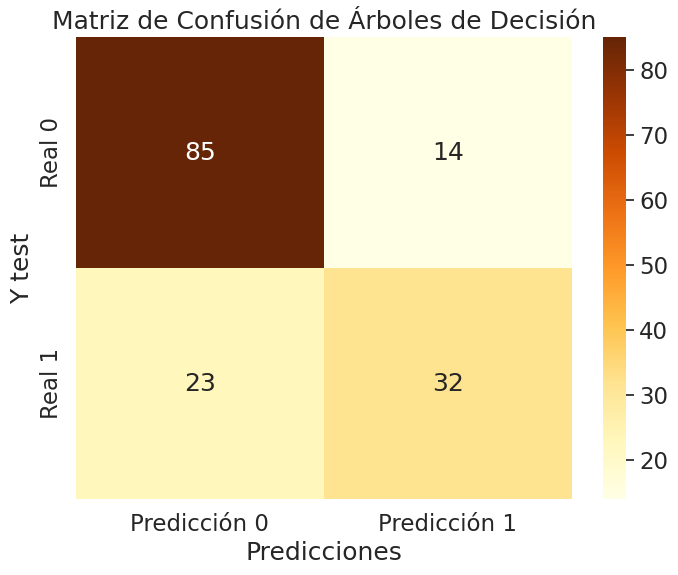

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Asumiendo que 'ytest' y 'ypred_dt' están definidos correctamente en tu código
m = confusion_matrix(ytest, ypred_dt)

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura para mejor visualización
sns.set(font_scale=1.5)  # Ajusta el tamaño de la fuente para facilitar la lectura
heatmap = sns.heatmap(m, annot=True, fmt="d", cmap="YlOrBr",
                      xticklabels=['Predicción 0', 'Predicción 1'],
                      yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión de Árboles de Decisión')

plt.show()



#Regresión Logística



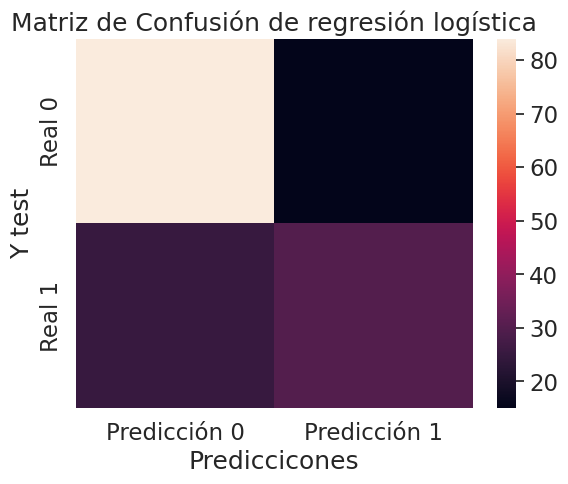

In [ ]:
m = confusion_matrix(ytest, ypred_lr)

# Crear un mapa de calor con seaborn
 # Ajusta el tamaño de la fuente
sns.heatmap(m,
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas
plt.xlabel('Prediccicones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión de regresión logística')

plt.show()

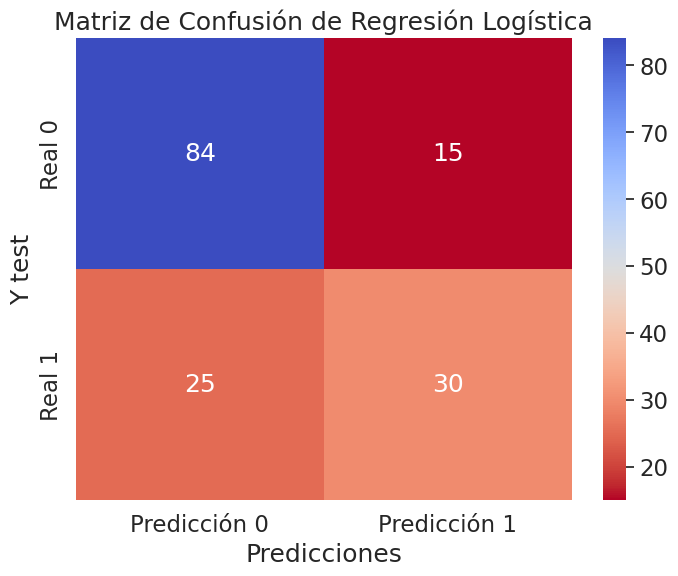

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


m = confusion_matrix(ytest, ypred_lr)

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura para mejor visualización
sns.set(font_scale=1.5)  # Ajusta el tamaño de la fuente para facilitar la lectura
heatmap = sns.heatmap(m, annot=True, fmt="d", cmap='coolwarm_r',
                      xticklabels=['Predicción 0', 'Predicción 1'],
                      yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión de Regresión Logística')

plt.show()


#Máquinas de Soporte Vectorial

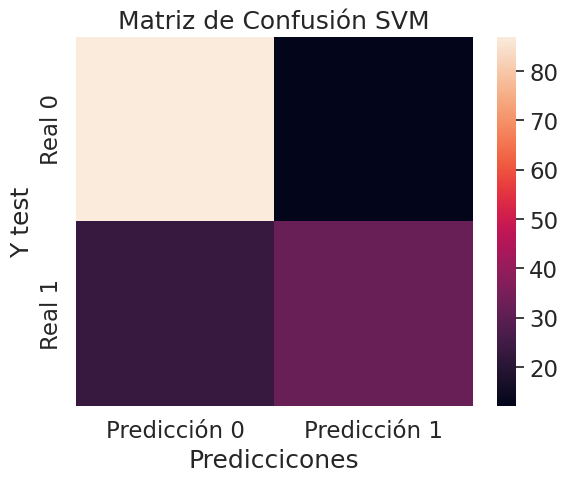

In [ ]:
m = confusion_matrix(ytest, pred1)

# Crear un mapa de calor con seaborn
 # Ajusta el tamaño de la fuente
sns.heatmap(m,
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas
plt.xlabel('Prediccicones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión SVM')

plt.show()

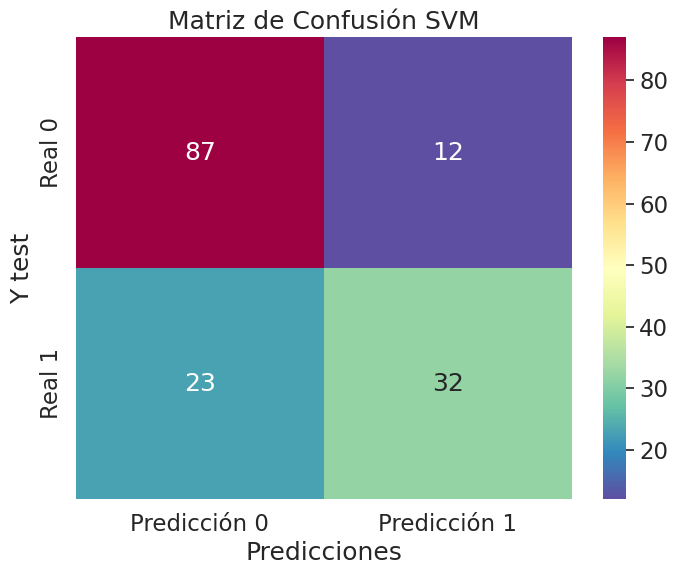

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Asumiendo que 'ytest' y 'pred1' están definidos correctamente en tu código
m = confusion_matrix(ytest, pred1)

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura para mejor visualización
sns.set(font_scale=1.5)  # Ajusta el tamaño de la fuente para facilitar la lectura
heatmap = sns.heatmap(m, annot=True, fmt="d", cmap='Spectral_r',
                      xticklabels=['Predicción 0', 'Predicción 1'],
                      yticklabels=['Real 0', 'Real 1'])

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Y test')
plt.title('Matriz de Confusión SVM')

plt.show()
